In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import os

In [3]:
%matplotlib inline

In [4]:
import sys
sys.path.append('d:\\Projekte\\Innprojekt\\GitHub\\development\\helper\\div_functions\\')

from eigene_ecdf import ecdf

In [5]:
% cd D:\Projekte\Innprojekt\Data\Q\BY\gkd_downloader

D:\Projekte\Innprojekt\Data\Q\BY\gkd_downloader


In [6]:
def ecdf_copypaste(data, ob_label, xlabel):
    import numpy as np
    sorted=np.sort(data)
    yvals=np.arange(len(sorted))/float(len(sorted))
    fig = plt.plot(sorted, yvals, label=ob_label)
    plt.xlabel(xlabel)
    plt.ylabel('Cumulative Probability')
    #plt.legend()
    plt.legend(loc='upper left')

In [7]:
def pandas_gkd_q_data(pegel_nr, wertebereich, von, bis):
    import time
    import re
    import requests
    import pandas as pd

    download_url = 'http://www.gkd.bayern.de/fluesse/download/index.php?wertart=' + wertebereich + '&beginn=' \
                    + von + '&ende=' + bis + '&msnr=' + pegel_nr + \
                    '&prbstnr=&thema=gkd&rubrik=fluesse&produkt=abfluss&parameter=&mpnr1=&mpnr2=&msprg=&gknr=6&dl=Download'
    html = requests.get(download_url).text
    time.sleep(5)
    start_url = html.find(';window.open(')
    ende_url = html.find(',\'_blank')
    download_csv_url = html[start_url:ende_url].split("'")[1]
    data = pd.read_csv(download_csv_url, header=9, decimal=',', sep=';', index_col=0,
                                parse_dates=True, infer_datetime_format=True, usecols=[0, 1], names=['Datum', 'Abfluss'])
    return data

In [9]:
stein = pandas_gkd_q_data('18483500', 'ezw', '19.09.2015', '19.09.2016')

In [10]:
stein_s = stein.ix[:,0]

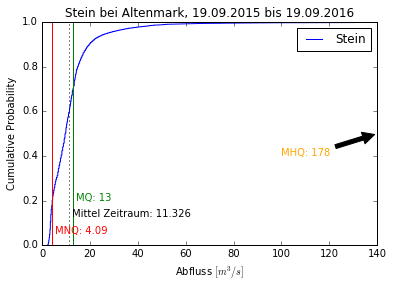

In [133]:
ecdf_copypaste(stein_s, 'Stein', 'Abfluss $[m^3/s]$')
plt.title('Stein bei Altenmark, 19.09.2015 bis 19.09.2016')
plt.legend(loc='upper right')
plt.axvline(stein_s.mean(), color='black', linestyle='dotted')
plt.annotate(r'Mittel Zeitraum: '+'{:.3f}'.format(stein_s.mean()), xy=[stein_s.mean()+(max(stein_s)/100),0.125], color='black')
plt.axvline(4.09, color='red')
plt.annotate(r'MNQ: 4.09', xy=[4.09+(max(stein_s)/100),0.05], color='red')
plt.axvline(13, color='green')
plt.annotate(r'MQ: 13', xy=[13+(max(stein_s)/100),0.2], color='green')
#plt.annotate(r'MHQ: 178', xy=[13+(max(stein_s)/100),0.2], color='green')
plt.annotate(r'MHQ: 178', xy=(140, 0.5), xytext=(100, 0.4),
            arrowprops=dict(facecolor='black', shrink=0.05), color='orange')
plt.savefig('Stein_ecdf.png', dpi=300)

In [40]:
import matplotlib.dates as mdates

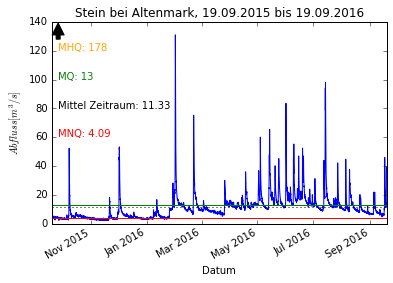

In [41]:
stein_s.plot()
xdate = mdates.date2num(stein_s.index[672])
plt.title('Stein bei Altenmark, 19.09.2015 bis 19.09.2016')
plt.ylabel('Abfluss $[m^3/s]$')
plt.axhline(stein_s.mean(), color='black', linestyle='dotted')
plt.annotate(r'Mittel Zeitraum: '+'{:.2f}'.format(stein_s.mean()), xy=[xdate,80], color='black')
plt.axhline(4.09, color='red')
plt.annotate(r'MNQ: 4.09', xy=[xdate,60], color='red')
plt.axhline(13, color='green')
plt.annotate(r'MQ: 13', xy=[xdate,100], color='green')
plt.annotate(r'MHQ: 178', xy=(xdate, 140), xytext=(xdate, 120),
            arrowprops=dict(facecolor='black', shrink=0.05), color='orange')
plt.savefig('Stein.png', dpi=300)

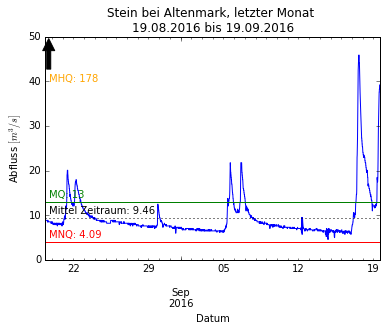

In [43]:
axes = stein_s[stein_s.index[-3000:]].plot()
xdate = axes.get_xlim()[0]
xoffset = (axes.get_xlim()[1] - axes.get_xlim()[0])*0.01
ydecke = axes.get_ylim()[1]
plt.title('Stein bei Altenmark, letzter Monat \n' + stein_s.index[-3000:][0].strftime('%d.%m.%Y') + ' bis ' + 
          stein_s.index[-3000:][-1].strftime('%d.%m.%Y'))
plt.ylabel('Abfluss $[m^3/s]$')
plt.axhline(stein_s[stein_s.index[-3000:]].mean(), color='black', linestyle='dotted')
plt.annotate(r'Mittel Zeitraum: '+'{:.2f}'.format(stein_s[stein_s.index[-3000:]].mean()), 
             xy=[xdate+xoffset,stein_s[stein_s.index[-3000:]].mean()+1], color='black')
plt.axhline(4.09, color='red')
plt.annotate(r'MNQ: 4.09', xy=[xdate+xoffset,4.09+1], color='red')
plt.axhline(13, color='green')
plt.annotate(r'MQ: 13', xy=[xdate+xoffset,13+1], color='green')
plt.annotate(r'MHQ: 178', xy=(xdate+xoffset, ydecke), xytext=(xdate+xoffset, ydecke-10),
            arrowprops=dict(facecolor='black', shrink=0.05), color='orange')
plt.savefig('Stein_letzterMonat.png', dpi=300)